In [142]:
import pandas as pd
import numpy as np
import seaborn as sns
df=pd.read_csv('heights.csv')
df.head()

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


In [143]:
df.shape

(10000, 2)

<AxesSubplot:xlabel='height', ylabel='Count'>

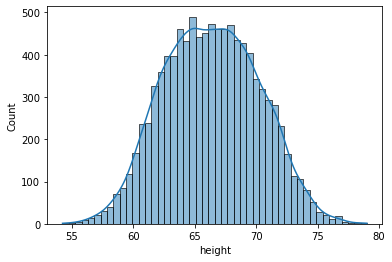

In [6]:
sns.histplot(df.height,kde=True)

In [7]:
mean=df.height.mean()
mean

66.367559754866

In [8]:
std=df.height.std()
std

3.847528120795573

In [9]:
mean-3*std

54.824975392479274

In [10]:
mean+3*std

77.91014411725271

In [12]:
df[(df.height<54.82) | (df.height>77.91)]

,gender,height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


In [31]:
df_no_outlier=df[(df.height<77.91) & (df.height>54.82)]

In [32]:
df_no_outlier.shape

(9993, 3)

In [30]:
 df.shape

(10000, 3)

In [21]:
df['zscore']=(df.height-df.height.mean())/df.height.std()
df.head()

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [27]:
df[(df['zscore']<-3) | (df['zscore']>3)]


,gender,height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [144]:
df=pd.read_csv('bhp.csv')
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [145]:
df.shape

(13200, 7)

In [185]:
max_threshold=df['price_per_sqft'].quantile(.999)
max_threshold

50959.36200000099

In [186]:
df[df['price_per_sqft']>max_threshold]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
1005,other,1 BHK,15.0,1.0,30.0,1,200000
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000
4924,other,7 BHK,5.0,7.0,115.0,7,2300000
5911,Mysore Road,1 Bedroom,45.0,1.0,23.0,1,51111
6356,Bommenahalli,4 Bedroom,2940.0,3.0,2250.0,4,76530
7012,other,1 BHK,650.0,1.0,500.0,1,76923
7575,other,1 BHK,425.0,1.0,750.0,1,176470
7799,other,4 BHK,2000.0,3.0,1063.0,4,53150


In [187]:
min_threshold=df['price_per_sqft'].quantile(0.001)
min_threshold

1366.184

In [189]:
df[df['price_per_sqft']<min_threshold]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
665,Yelahanka,3 BHK,35000.0,3.0,130.0,3,371
798,other,4 Bedroom,10961.0,4.0,80.0,4,729
1867,other,3 Bedroom,52272.0,2.0,140.0,3,267
2392,other,4 Bedroom,2000.0,3.0,25.0,4,1250
3934,other,1 BHK,1500.0,1.0,19.5,1,1300
5343,other,9 BHK,42000.0,8.0,175.0,9,416
5417,Ulsoor,4 BHK,36000.0,4.0,450.0,4,1250
5597,JP Nagar,2 BHK,1100.0,1.0,15.0,2,1363
7166,Yelahanka,1 Bedroom,26136.0,1.0,150.0,1,573
7862,JP Nagar,3 BHK,20000.0,3.0,175.0,3,875


In [201]:
df2=df[(df.price_per_sqft<max_threshold) & (df.price_per_sqft>min_threshold)]
df2.shape               

(13172, 7)

In [198]:
df2=df[(df.price_per_sqft<max_threshold) & (df.price_per_sqft>min_threshold)]
df2.shape

(13172, 7)

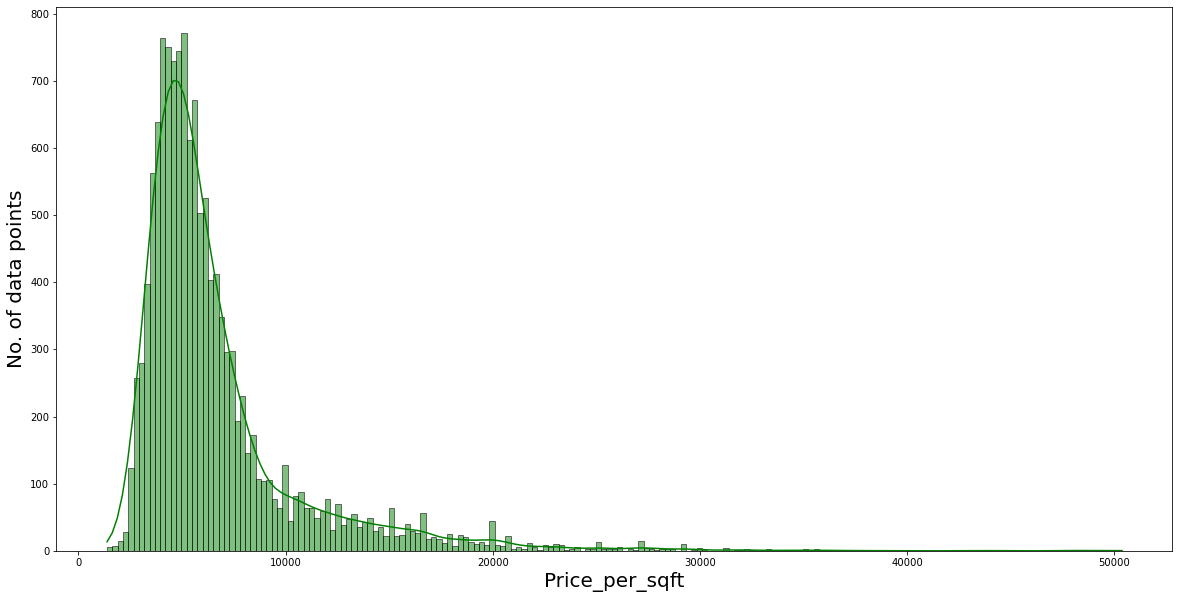

In [216]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.xlabel('Price_per_sqft',size=20)
plt.ylabel('No. of data points',size=20)
sns.histplot(df2['price_per_sqft'],kde=True,color='Green')
plt.show()

In [219]:
mean=df2.price_per_sqft.mean()

In [220]:
std=df2.price_per_sqft.std()

In [225]:
mean-4*std

-9900.429065502582

In [226]:
mean+4*std

23227.73653589432

In [227]:
df[df['price_per_sqft']<-5759.40]

,location,size,total_sqft,bath,price,bhk,price_per_sqft


In [229]:
df[df['price_per_sqft']>23227.73]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333
190,Bellandur,4 Bedroom,1200.0,5.0,325.0,4,27083
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
733,Cunningham Road,4 BHK,5270.0,4.0,1250.0,4,23719
...,...,...,...,...,...,...,...
13081,other,6 Bedroom,8000.0,6.0,2800.0,6,35000
13094,other,4 Bedroom,1200.0,5.0,325.0,4,27083
13127,other,4 Bedroom,1200.0,5.0,325.0,4,27083
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000


In [235]:
df3=df2[(df2['price_per_sqft']>-5759.40) & (df2['price_per_sqft']<23227.73)]
df3.shape

(13047, 7)

<AxesSubplot:xlabel='price_per_sqft', ylabel='Count'>

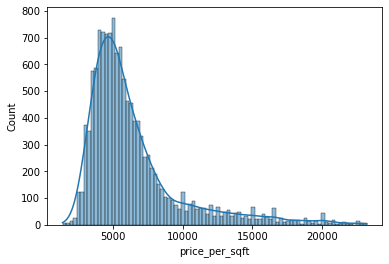

In [237]:
sns.histplot(df3['price_per_sqft'],kde=True)